# 📈 Prédire la valeur de l’action Google dans le futur

**Contexte :** <blockquote> Vous êtes datascientist chez Google en charge d'un nouveau projet autour de TimeSeries. Votre premier projet consiste à proposer une solution permettant de prédire la tendance de l'action Google dans le futur et de former une nouvelle équipe de datascientists (juniors) sur les RNN et en particulier les LSTM.

    
Pour réaliser ce projet, vous avez accés à deux datasets :
* Dataset Train : 5 années d’historique de l’action google 2012 - 2016
* Dataset Test : un mois de données Janvier 2017

Développer une solution basée sur les réseaux de neurones récurrents de type LSTM et permettant de prédire l'action Google dans le futur</blockquote> 

# 👩🏻‍💻 Exploration des données

## Imports

🔎 Import Librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

🔎 Import Dataset

In [2]:
df = pd.read_csv('C:/Users/zaome/Documents/Week_formation/Projet_TimeSerie/Google_Stock_Price_Train.csv', index_col='Date', parse_dates=['Date'])
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
#df = pd.read_csv?
#df

## Informations des données

In [4]:
df.shape

(1258, 5)

🔎 Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


🔎 Data Descriptive

In [6]:
df.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


🔎 Types de données

In [7]:
df.dtypes.value_counts()

float64    3
object     2
dtype: int64

In [8]:
df.dtypes

Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

🔎 Valeurs manquantes

In [9]:
df.isnull().sum().sort_values()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

🔎 Duplicates

In [10]:
df.duplicated().sum()

0

# 🎨 Visualisations

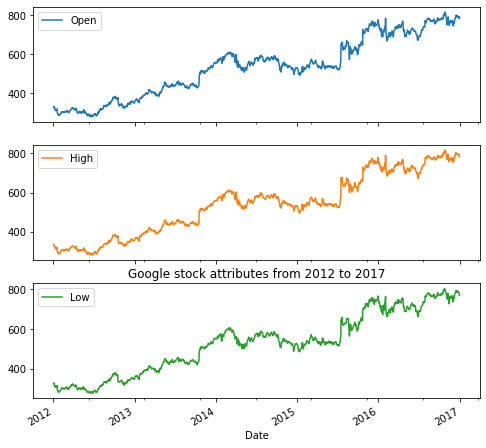

In [11]:
df.plot(subplots=True, figsize=(8,8))
plt.title('Google stock attributes from 2012 to 2017')
plt.show()

# 🌌Preprocessing

## Import librairies

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

## Standardisation et Echantillonnage

In [13]:
training_set = df.iloc[:,1:2].values

In [14]:
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

In [15]:
X_train=[]
y_train=[]
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [16]:
training_set_scaled.shape

(1258, 1)

In [17]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [18]:
X_train.shape

(1198, 60, 1)

In [19]:
y_train.shape

(1198,)

# 🔢 Modèles

In [20]:
regressor = Sequential()

In [21]:
regressor.add(LSTM(units=30,return_sequences=True,input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.4))

In [22]:
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.6))

In [23]:
regressor.add(LSTM(units=100))
regressor.add(Dropout(0.4))

In [24]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [25]:
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
38/38 [==============================] - 27s 309ms/step - loss: 0.1856
Epoch 2/50
38/38 [==============================] - 13s 331ms/step - loss: 0.1357
Epoch 3/50
38/38 [==============================] - 10s 274ms/step - loss: 0.1336
Epoch 4/50
38/38 [==============================] - 8s 221ms/step - loss: 0.1325
Epoch 5/50
38/38 [==============================] - 12s 310ms/step - loss: 0.1328
Epoch 6/50
38/38 [==============================] - 8s 219ms/step - loss: 0.1314
Epoch 7/50
38/38 [==============================] - 9s 249ms/step - loss: 0.1324
Epoch 8/50
38/38 [==============================] - 8s 221ms/step - loss: 0.1319 1s - loss: 
Epoch 9/50
38/38 [==============================] - 13s 332ms/step - loss: 0.1319
Epoch 10/50
38/38 [==============================] - 10s 248ms/step - loss: 0.1316
Epoch 11/50
38/38 [==============================] - 10s 273ms/step - loss: 0.1326
Epoch 12/50
38/38 [==============================] - 11s 286ms/step - loss: 0.1315
Epoch

# Modèle test

In [32]:
test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test.iloc[:, 1:2].values
total_data=pd.concat([df['Open'],test['Open']],axis=0)

In [34]:
inputs = total_data[len(df)-len(test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [35]:
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test.shape
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [36]:
predicted = regressor.predict(X_test)
predicted = sc.inverse_transform(predicted)

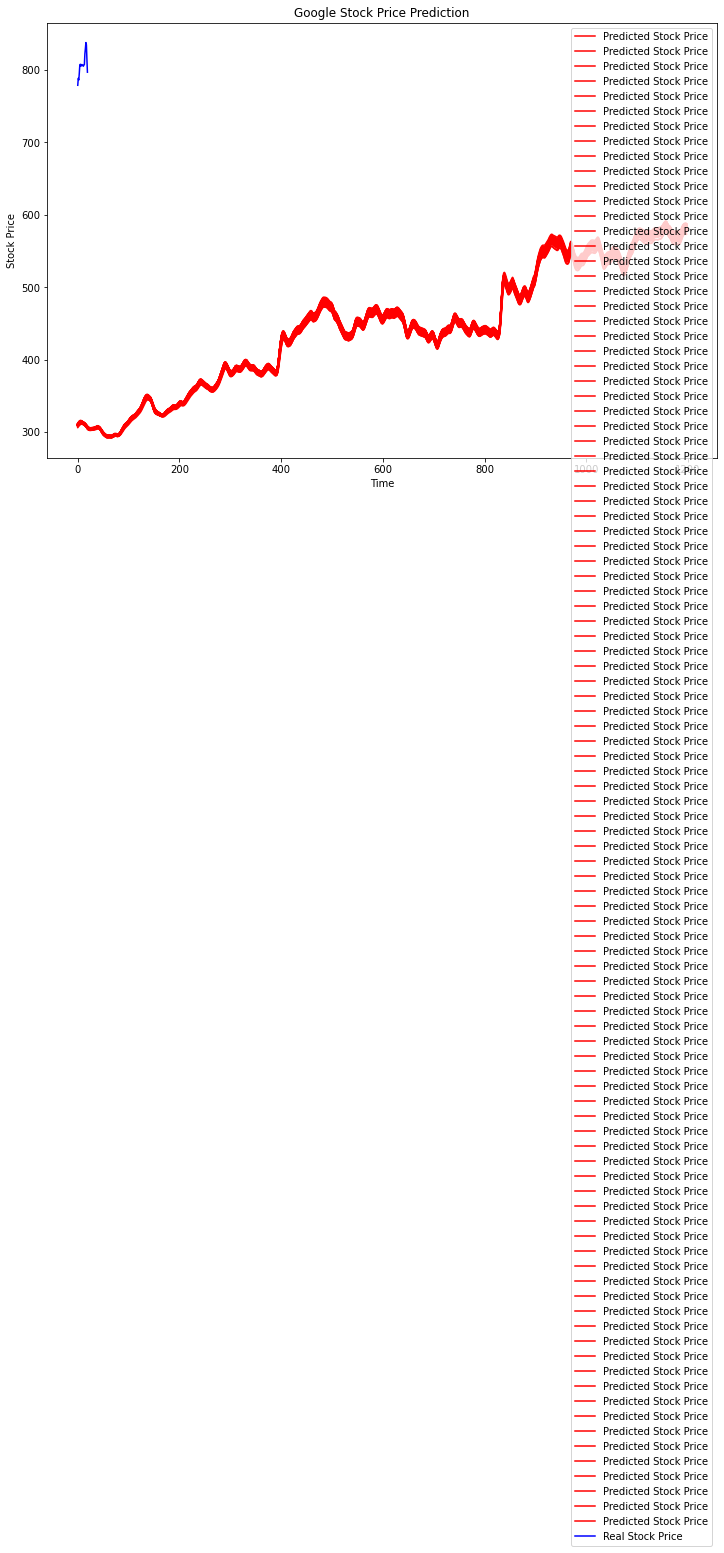

In [38]:
#Visualization
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(predicted_stock_price,color='red',label='Predicted Stock Price')
plt.plot(real_stock_price,color='blue',label='Real Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()